In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# creating dataframe from csv file
df = pd.read_csv('../data.csv')
del df["Id"]

print("DataFrame Shape is : {}".format(df.shape))
df.head()

DataFrame Shape is : (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# getting all the description of numerical columns
df_description = df.describe()
# total 38 columns having numerical value
df_description.shape

(8, 37)

In [3]:
# description of all the numerical columns, like count, mean , std, max etc
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
print(df_description)

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

# Objective 

* To predict the final SalePrice of each home.

In [4]:
# summary of SalePrice column
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

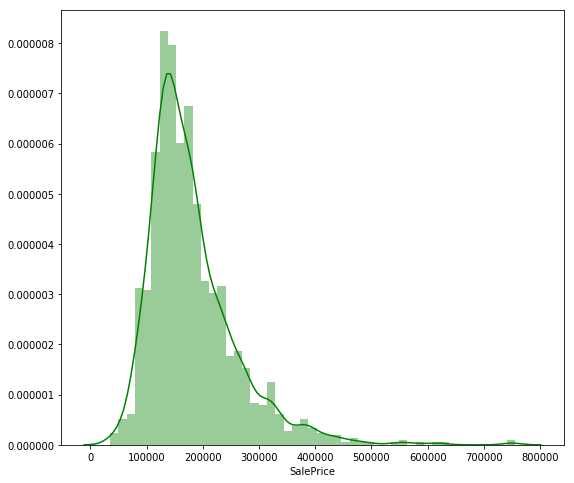

In [5]:
# histogram, alongwith Kernel density distribution
plt.close()
# by default it will optimize total bins
plt.figure(figsize=(9, 8))
sns.distplot(df.SalePrice,color='g') 
plt.show()

In [6]:
# df info to see how many non null values given column has
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

# Removing unimportant features

* We are seeing lot of features having too much missing values. So removing them.


In [7]:
# columns having null objects in excess of 70%
bad_features = [column for column in df if df[column].count() / len(df) <= 0.3]

print("List of bad features: {}".format(bad_features))

List of bad features: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
# removing bad features from the dataframe
for feature in bad_features:
    del df[feature]

print("DataFrame shape after deleting bad features : {}".format(df.shape))

DataFrame shape after deleting bad features : (1460, 76)


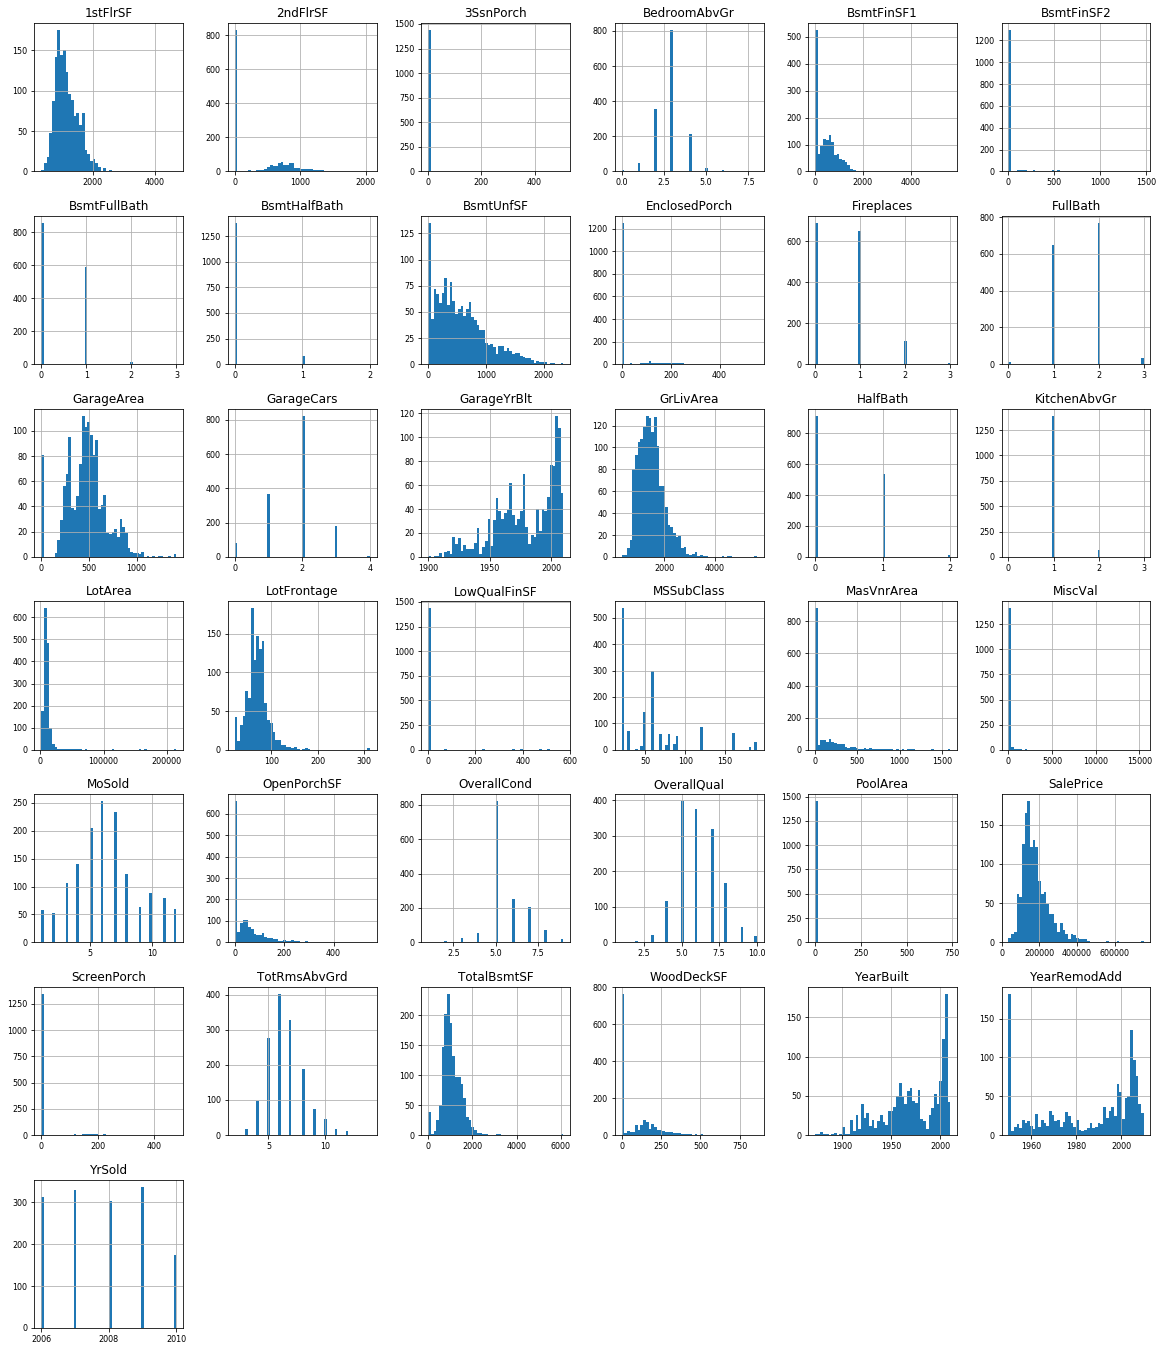

In [9]:
# extracting numerical columns from df
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# ploting histograms of all the features
plt.close()
df_numerical.hist(figsize=(20, 24), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

* Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`,`1stFlrSF`, ... seems to share a similar distribution to the one we have with `SalePrice`

In [10]:
# Correlation among the different variables
df_numerical_corr = df_numerical.corr()['SalePrice']
golden_features_list = df_numerical_corr[abs(df_numerical_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


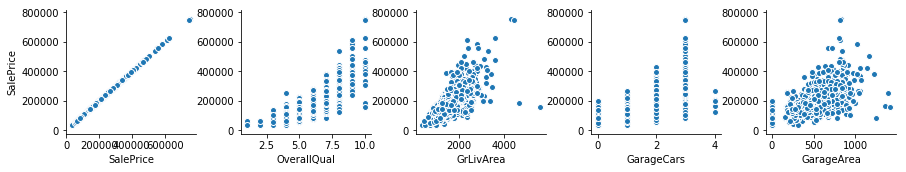

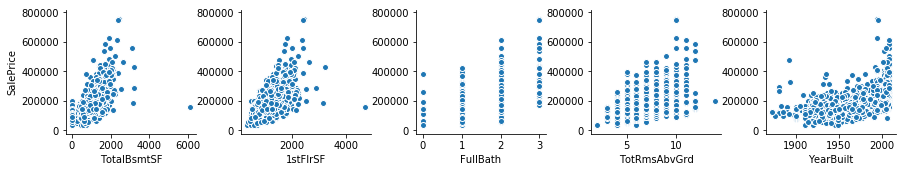

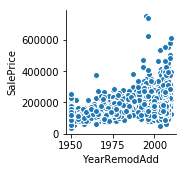

In [11]:
# # creating dataframe having only columns that have correlation > 0.5 with salesprice
df_good_feature = df[golden_features_list.keys()]

# Pair plots of salesprice with all golden columns
plt.close()
for i in range(0, len(df_good_feature.columns), 5):
    sns.pairplot(data=df,
                x_vars=df_good_feature.columns[i:i+5],
                y_vars=['SalePrice'])
    
plt.show()

In [12]:
import copy
df_good_feature_poly = copy.deepcopy(df_good_feature)

for column in df_good_feature:
    df_good_feature_poly[column + "_squared"] = df_good_feature[column] ** 2
    df_good_feature_poly[column + "_cubed"] = df_good_feature[column] ** 3


In [13]:
df_good_feature_poly.head()
df_good_feature_poly.shape

(1460, 33)

In [14]:
normalized_df_good_feature=(df_good_feature-df_good_feature.mean())/df_good_feature.std()

normalized_df_good_feature_poly = (df_good_feature_poly-df_good_feature_poly.mean())/df_good_feature_poly.std()

In [15]:
print(normalized_df_good_feature_poly.shape)
normalized_df_good_feature_poly.head()

(1460, 33)


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice_squared,SalePrice_cubed,OverallQual_squared,OverallQual_cubed,GrLivArea_squared,GrLivArea_cubed,GarageCars_squared,GarageCars_cubed,GarageArea_squared,GarageArea_cubed,TotalBsmtSF_squared,TotalBsmtSF_cubed,1stFlrSF_squared,1stFlrSF_cubed,FullBath_squared,FullBath_cubed,TotRmsAbvGrd_squared,TotRmsAbvGrd_cubed,YearBuilt_squared,YearBuilt_cubed,YearRemodAdd_squared,YearRemodAdd_cubed
0,0.347154,0.651256,0.370207,0.311618,0.350880,-0.459145,-0.793162,0.789470,0.911897,1.050634,0.878367,0.103141,-0.051611,0.564972,0.453642,0.170300,0.008432,0.123702,-0.039566,0.137825,-0.033559,-0.411933,-0.201283,-0.661304,-0.426947,0.706459,0.571834,0.808953,0.657828,1.056355,1.061983,0.879477,0.880569
1,0.007286,-0.071812,-0.482347,0.311618,-0.060710,0.466305,0.257052,0.789470,-0.318574,0.156680,-0.429430,-0.141858,-0.181773,-0.177887,-0.261609,-0.474731,-0.366017,0.123702,-0.039566,-0.257666,-0.322135,0.201175,0.013844,0.078838,-0.044750,0.706459,0.571834,-0.390887,-0.420397,0.149911,0.143088,-0.434802,-0.440154
2,0.535970,0.651256,0.514836,0.311618,0.631510,-0.313261,-0.627611,0.789470,-0.318574,0.984415,0.829930,0.253910,0.037010,0.564972,0.453642,0.299018,0.095682,0.123702,-0.039566,0.447070,0.224794,-0.330891,-0.177717,-0.563471,-0.385080,0.706459,0.571834,-0.390887,-0.420397,0.988789,0.993060,0.830482,0.831013
3,-0.515105,0.651256,0.383528,1.649742,0.790533,-0.687089,-0.521555,-1.025689,0.296662,-1.862993,-0.720051,-0.452288,-0.318268,0.564972,0.453642,0.181922,0.016153,2.061530,2.209531,0.636559,0.395859,-0.526867,-0.231644,-0.497091,-0.355002,-0.992767,-0.891030,0.166181,0.042220,-1.852691,-1.842255,-0.724442,-0.728796
4,0.869545,1.374324,1.298881,1.649742,1.697903,0.199611,-0.045596,0.789470,1.527133,0.951306,0.733056,0.545855,0.225218,1.422117,1.405433,1.094207,0.712022,2.061530,2.209531,1.914968,1.767982,0.000383,-0.065316,-0.163558,-0.185388,0.706459,0.571834,1.537427,1.448284,0.955032,0.958650,0.732565,0.732048


In [16]:
print(normalized_df_good_feature.shape)
normalized_df_good_feature.head()

(1460, 11)


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.347154,0.651256,0.370207,0.311618,0.350880,-0.459145,-0.793162,0.789470,0.911897,1.050634,0.878367
1,0.007286,-0.071812,-0.482347,0.311618,-0.060710,0.466305,0.257052,0.789470,-0.318574,0.156680,-0.429430
2,0.535970,0.651256,0.514836,0.311618,0.631510,-0.313261,-0.627611,0.789470,-0.318574,0.984415,0.829930
3,-0.515105,0.651256,0.383528,1.649742,0.790533,-0.687089,-0.521555,-1.025689,0.296662,-1.862993,-0.720051
4,0.869545,1.374324,1.298881,1.649742,1.697903,0.199611,-0.045596,0.789470,1.527133,0.951306,0.733056


In [17]:
Y = normalized_df_good_feature['SalePrice']
X = normalized_df_good_feature.drop("SalePrice", axis=1)

Y_poly = normalized_df_good_feature_poly['SalePrice']
X_poly = normalized_df_good_feature_poly.drop("SalePrice", axis=1)
X_poly = X_poly.drop("SalePrice_squared", axis=1)
X_poly = X_poly.drop("SalePrice_cubed", axis=1)
print(X.shape)
print(Y.shape)
print(X_poly.shape)
print(Y_poly.shape)

(1460, 10)
(1460,)
(1460, 30)
(1460,)


In [18]:
from sklearn.model_selection import train_test_split
X_Train, X_Test , Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

# X_Train_hot, X_Test_hot , Y_Train_hot, Y_Test_hot = train_test_split(X_one_hot, Y_one_hot, test_size = 0.2, random_state = 40)

X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test = train_test_split(X_poly, Y_poly, test_size = 0.2, random_state = 40)

# Linear Regression

Mean Absolute Error : 0.26907899198031154


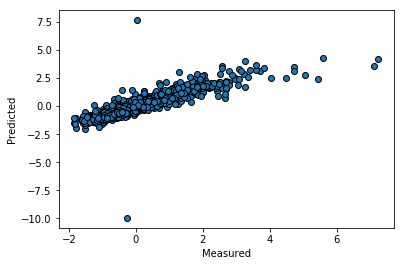

In [19]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression(fit_intercept=False)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_poly, Y_poly, cv=10)

err=sum(np.absolute(predicted-Y_poly))/(len(Y_poly))
print("Mean Absolute Error : {}".format(err))

fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Mean Absolute Error : 0.3043719861645638


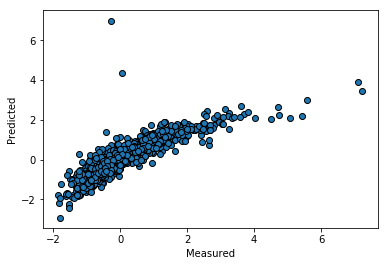

In [20]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression(fit_intercept=False)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, Y, cv=10)

err=sum(np.absolute(predicted-Y))/(len(Y))
print("Mean Absolute Error : {}".format(err))

fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [21]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
def final_abs_error(X, Y, n_splits = 5):
    kf = KFold(n_splits, random_state= 50, shuffle=True)
    error = 0
    lm = LinearRegression(normalize=False,fit_intercept=False)
    for train_index, test_index in kf.split(X):
    
            X_train, X_test = X.as_matrix()[train_index], X.as_matrix()[test_index]
            Y_train, Y_test = Y.as_matrix()[train_index], Y.as_matrix()[test_index]
            
            lm.fit(X_train,Y_train) 
            Y_pred = lm.predict(X_test)
            error = error + sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
                                                         
    return error/n_splits


print(final_abs_error(X_poly, Y_poly))
print(final_abs_error(X, Y))
                                                         

0.27683258013758494
0.3068269201619205


# Lasso Rigression

In [22]:
from sklearn.linear_model import Lasso
from sklearn.grid_search import GridSearchCV

# X_Train, X_Test , Y_Train, Y_Test

param_grid = {
              'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10,20,50],
               'max_iter' : [100,300,500,1000,2000,5000,10000]
              }

linlasso = Lasso(fit_intercept=False)
# this may take some minutes
gs_cv = GridSearchCV(linlasso, param_grid, n_jobs=4).fit(X_Train,Y_Train)

# best hyperparameter setting
gs_cv.best_params_

/Users/anupamavijjapu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/anupamavijjapu/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'alpha': 0.01, 'max_iter': 100}

Mean Absolute Error : 0.2777986774500402


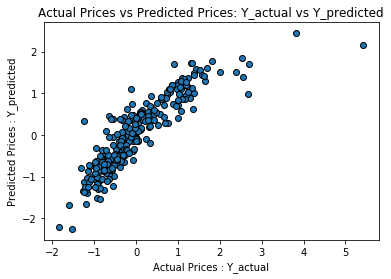

In [23]:
# X_Train, X_Test , Y_Train, Y_Test
linlasso = Lasso(alpha=0.01, max_iter=100,fit_intercept=False)
linlasso.fit(X_Train, Y_Train) 

Y_pred = linlasso.predict(X_Test)
err=sum(np.absolute(Y_pred-Y_Test))/(len(Y_Test))
print("Mean Absolute Error : {}".format(err))

# removing normalization fron Saleprice column
plt.scatter(Y_Test, Y_pred, edgecolors=(0, 0, 0))
plt.xlabel("Actual Prices : Y_actual")
plt.ylabel("Predicted Prices : Y_predicted")
plt.title("Actual Prices vs Predicted Prices: Y_actual vs Y_predicted")
plt.show()

In [24]:
# X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test

param_grid = {
              'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10,20,50],
               'max_iter' : [100,300,500,1000,2000,5000,10000]
              }

linlasso = Lasso(fit_intercept=False)
# this may take some minutes
gs_cv = GridSearchCV(linlasso, param_grid, n_jobs=4).fit(X_poly_Train,Y_poly_Train)

# best hyperparameter setting
gs_cv.best_params_

{'alpha': 0.1, 'max_iter': 300}

Mean Absolute Error : 0.2606535599848283


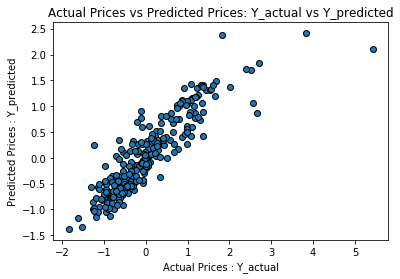

In [25]:
# X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test
linlasso = Lasso(alpha=0.1, max_iter=300,fit_intercept=False)
linlasso.fit(X_poly_Train, Y_poly_Train) 

Y_pred = linlasso.predict(X_poly_Test)
err=sum(np.absolute(Y_pred-Y_poly_Test))/(len(Y_poly_Test))
print("Mean Absolute Error : {}".format(err))

# removing normalization fron Saleprice column
plt.scatter(Y_Test, Y_pred, edgecolors=(0, 0, 0))
plt.xlabel("Actual Prices : Y_actual")
plt.ylabel("Predicted Prices : Y_predicted")
plt.title("Actual Prices vs Predicted Prices: Y_actual vs Y_predicted")
plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
# X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test
# X_Train, X_Test , Y_Train, Y_Test

def final_abs_error_lasso(X, Y, n_splits = 5):
    kf = KFold(n_splits, random_state= 50, shuffle=True)
    error = 0
    lm = Lasso(normalize=False,fit_intercept=False)
    param_grid = {
              'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10,20,50],
               'max_iter' : [100,300,500,1000,2000,5000,10000]
              }
    for train_index, test_index in kf.split(X):
    
            X_train, X_test = X.as_matrix()[train_index], X.as_matrix()[test_index]
            Y_train, Y_test = Y.as_matrix()[train_index], Y.as_matrix()[test_index]
            
            gs_cv = GridSearchCV(lm, param_grid, n_jobs=4).fit(X_train,Y_train)
             
            Y_pred = Lasso(alpha = gs_cv.best_params_['alpha'] ,max_iter = gs_cv.best_params_['max_iter'], normalize=False, fit_intercept=False).fit(X_train,Y_train ).predict(X_test)
            error = error + sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
                                                         
    return error/n_splits

print(final_abs_error_lasso(X_poly, Y_poly, 10))
print(final_abs_error_lasso(X, Y, 10))

0.2694658117199893
0.304264612253489


# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV

# X_Train, X_Test , Y_Train, Y_Test

param_grid = {
              'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10,20,50,100,200,400,500,1000]
              }

linridge = Ridge(fit_intercept=False)
# this may take some minutes
gs_cv = GridSearchCV(linridge, param_grid, n_jobs=4).fit(X_Train,Y_Train)

# best hyperparameter setting
gs_cv.best_params_

{'alpha': 100}

Mean Absolute Error : 0.27038143485291705


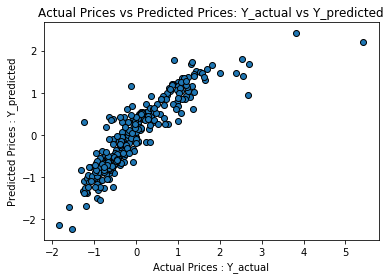

In [28]:
# X_Train, X_Test , Y_Train, Y_Test
linridge = Ridge(alpha=100, fit_intercept=False)
linridge.fit(X_Train, Y_Train) 

Y_pred = linridge.predict(X_Test)
err=sum(np.absolute(Y_pred-Y_Test))/(len(Y_Test))
print("Mean Absolute Error : {}".format(err))

# removing normalization fron Saleprice column
plt.scatter(Y_Test, Y_pred, edgecolors=(0, 0, 0))
plt.xlabel("Actual Prices : Y_actual")
plt.ylabel("Predicted Prices : Y_predicted")
plt.title("Actual Prices vs Predicted Prices: Y_actual vs Y_predicted")
plt.show()

In [29]:
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV

# X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test

param_grid = {
              'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10,20,50,100,200,400,500,1000]
              }

linridge = Ridge(fit_intercept=False)
# this may take some minutes
gs_cv = GridSearchCV(linridge, param_grid, n_jobs=4).fit(X_poly_Train,Y_poly_Train)

# best hyperparameter setting
gs_cv.best_params_

{'alpha': 1000}

Mean Absolute Error : 0.2543498097007682


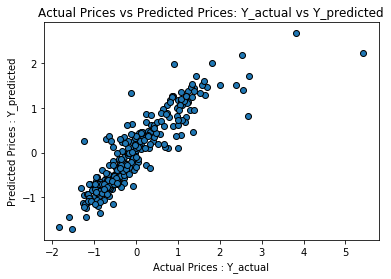

In [30]:
# X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test
linridge = Ridge(fit_intercept=False, alpha= 1000)
linridge.fit(X_poly_Train, Y_poly_Train) 

Y_pred = linridge.predict(X_poly_Test)
err=sum(np.absolute(Y_pred-Y_poly_Test))/(len(Y_poly_Test))
print("Mean Absolute Error : {}".format(err))

# removing normalization fron Saleprice column
plt.scatter(Y_Test, Y_pred, edgecolors=(0, 0, 0))
plt.xlabel("Actual Prices : Y_actual")
plt.ylabel("Predicted Prices : Y_predicted")
plt.title("Actual Prices vs Predicted Prices: Y_actual vs Y_predicted")
plt.show()

In [31]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
# X_poly_Train, X_poly_Test , Y_poly_Train, Y_poly_Test
# X_Train, X_Test , Y_Train, Y_Test

def final_abs_error_ridge(X, Y, n_splits = 5):
    kf = KFold(n_splits, random_state= 50, shuffle=True)
    error = 0
    lm = Ridge(normalize=False,fit_intercept=False)
    param_grid = {
              'alpha': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10,20,50,100,200,400,500,1000]
              }
    for train_index, test_index in kf.split(X):
    
            X_train, X_test = X.as_matrix()[train_index], X.as_matrix()[test_index]
            Y_train, Y_test = Y.as_matrix()[train_index], Y.as_matrix()[test_index]
            
            gs_cv = GridSearchCV(lm, param_grid, n_jobs=4).fit(X_train,Y_train)
             
            Y_pred = Ridge(alpha = gs_cv.best_params_['alpha'], normalize=False, fit_intercept=False).fit(X_train,Y_train ).predict(X_test)
            error = error + sum(np.absolute(Y_pred-Y_test))/(len(Y_test))
                                                         
    return error/n_splits

print(final_abs_error_ridge(X_poly, Y_poly, 15))
print(final_abs_error_ridge(X, Y, 15))


0.27163225153277204
0.30288372693840576
